# <span style="color:red">**Machine Learnig**</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
Base_Lambayeque = "../data/final/base_lambayeque_final.xlsx"  # Reemplaza con la ruta de tu archivo
df = pd.read_excel(Base_Lambayeque)

In [4]:

df.head()

,age,civil,jefe,lenguacat,educ,estatal,pobreza,male,age_sq,raza,urban,zona,h_skill,m_skill,l_skill,ramactsec,contrato,exper,exper_sq,ln_ing_lab
0,38,Casado(a),1,Castellano,Secundaria,1,0,1,1444,Mestizo,1,Costa,0,0,1,Sector Secundario,0.0,21,441,7.166202
1,50,Separado(a),1,Castellano,Primaria,1,0,0,2500,Blanco,1,Costa,0,1,0,Sector Primario,NaN,41,1681,4.840517
2,44,Separado(a),1,Castellano,Primaria,1,1,0,1936,Mestizo,1,Costa,0,1,0,Sector Secundario,0.0,32,1024,7.005562
3,25,Soltero(a),0,Castellano,Secundaria,1,1,1,625,Mestizo,1,Costa,0,0,1,Sector Terciario,0.0,10,100,6.904583
4,52,Casado(a),1,Castellano,Superior universitaria,1,0,1,2704,Mestizo,1,Costa,1,0,0,Sector Terciario,0.0,30,900,8.090530


Comenzamos...

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         2442 non-null   int64  
 1   civil       2442 non-null   object 
 2   jefe        2442 non-null   int64  
 3   lenguacat   2442 non-null   object 
 4   educ        2442 non-null   object 
 5   estatal     2442 non-null   int64  
 6   pobreza     2442 non-null   int64  
 7   male        2442 non-null   int64  
 8   age_sq      2442 non-null   int64  
 9   raza        2442 non-null   object 
 10  urban       2442 non-null   int64  
 11  zona        2442 non-null   object 
 12  h_skill     2442 non-null   int64  
 13  m_skill     2442 non-null   int64  
 14  l_skill     2442 non-null   int64  
 15  ramactsec   2442 non-null   object 
 16  contrato    1327 non-null   float64
 17  exper       2442 non-null   int64  
 18  exper_sq    2442 non-null   int64  
 19  ln_ing_lab  2442 non-null  

In [6]:
#PARA EVALUAR LOS MISSINGS
# ! NO MODIFICAR
# * Función creada para contar el porcentaje de missings existente por cada variable

def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Porcentaje de missing values por columna', fontsize=20, weight='bold' , y=1.1)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns con más de {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columnas con menos de {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columnas', size=15, weight='bold')
    plt.ylabel('Porcentaje de missing values')
    plt.yticks(weight ='bold')
    
    return plt.show()

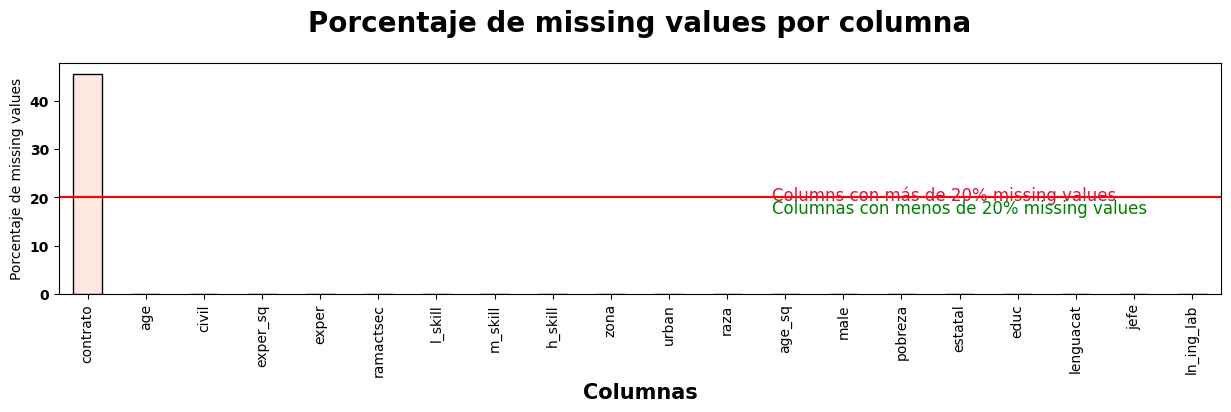

In [7]:
msv_1(df, 20, color=sns.color_palette('Reds',15)) ## LA VARIABLE CONTRATO TIENE MUCHOS MISSINGS

DEFINIMOS LAS VARIABLES INDEPENDIENTES Y DEPENDIENTES

In [8]:

                                    
                                    ####Antes hay que transformar las categóricas (object) en formato numérico (manteniendo orden jerarquico)###

Var_categorica_que_debemos_modificar = ['civil', 'lenguacat', 'educ', 'raza', 'zona', 'ramactsec']
df_encoded = pd.get_dummies(df, columns=Var_categorica_que_debemos_modificar, drop_first=True)
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar a cada variable categórica
for col in Var_categorica_que_debemos_modificar:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,civil,jefe,lenguacat,educ,estatal,pobreza,male,age_sq,raza,urban,zona,h_skill,m_skill,l_skill,ramactsec,contrato,exper,exper_sq,ln_ing_lab
0,38,0,1,0,2,1,0,1,1444,1,1,0,0,0,1,1,0.0,21,441,7.166202
1,50,3,1,0,1,1,0,0,2500,0,1,0,0,1,0,0,NaN,41,1681,4.840517
2,44,3,1,0,1,1,1,0,1936,1,1,0,0,1,0,1,0.0,32,1024,7.005562
3,25,4,0,0,2,1,1,1,625,1,1,0,0,0,1,2,0.0,10,100,6.904583
4,52,0,1,0,5,1,0,1,2704,1,1,0,1,0,0,2,0.0,30,900,8.090530


In [9]:
X = df[['estatal', 'pobreza', 'male', 'age', 'age_sq', 'urban', 
        'h_skill', 'm_skill', 'l_skill', 'exper', 'exper_sq', 'civil', 'lenguacat', 'educ', 'raza', 'zona', 'ramactsec']]  
## no estamos considerando "Contrato" (contiene información con missings y no se los eliminó porque implicaba la pérdida de más de la mitad de la base de datos)

y = df[['ln_ing_lab']]



MODELO LASSO: Entrenar de un modelo Lasso para la selección de variables más importantes. Este modelo debe ser entrenado con la selección de mejores parámetros a través de un GridSearch con métrica MAPE.

In [10]:
from sklearn.linear_model import Lasso


In [11]:

                              #####ANTES ES IMPORTANTE CONSTRUIR MATEMÁTICAMENTE LAS MÉTRICAS DE EVALUACIÓN ##########


from sklearn import metrics

# Función print_evaluate(true, predicted): imprime las métricas de evaluación del modelo.
def print_evaluate(true, predicted):  

    mape = np.mean(np.abs((true - predicted) / true)) * 100  # Error porcentual absoluto medio (MAPE)
    mpe = np.mean((true - predicted) / true) * 100  # Error porcentual medio (MPE)
    r2_square = metrics.r2_score(true, predicted)  # Coeficiente de determinación R^2
    
    # Calcular el porcentaje de observaciones dentro del ±20% de MAPE
    ape = np.abs((true - predicted) / true) * 100
    within_20_percent = np.sum(ape <= 20) / len(true) * 100
    
    print('MAPE:', mape)
    print('MPE:', mpe)
    print('R2 Square:', r2_square)
    print('% Observaciones en ±20% de MAPE:', within_20_percent)
    print('__________________________________')

ENTRENAMOS EL PRIMER MODELO (LASSO)

In [12]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import numpy as np
import pandas as pd

In [13]:
# MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Definimos GridSearch
param_grid = {'alpha': np.logspace(-4, 0, 50)}
lasso = Lasso(max_iter=10000, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, scoring=mape_scorer, cv=5, n_jobs=-1)

# Entrenamos el modelo
grid_search.fit(X_train, y_train)

# Buscamos el Mejor modelo y alpha
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha: {best_alpha}")

y_pred_train = best_lasso.predict(X_train)
y_pred_test = best_lasso.predict(X_test)

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"MAPE en entrenamiento: {mape_train}")
print(f"MAPE en prueba: {mape_test}")

# Coeficientes no nulos
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": best_lasso.coef_
})

variables_importantes = coeficientes[coeficientes["Coeficiente"] != 0]
print(variables_importantes)


Mejor alpha: 0.0001
MAPE en entrenamiento: 0.11588270106605773
MAPE en prueba: 0.11703823348269954
     Variable  Coeficiente
0     estatal    -0.133610
1     pobreza    -0.411162
2        male     0.805770
3         age     0.090205
4      age_sq    -0.000426
5       urban     0.189234
6     h_skill     0.534393
8     l_skill    -0.077059
9       exper    -0.036644
10   exper_sq    -0.000280
11      civil    -0.021311
12  lenguacat    -0.029616
13       educ    -0.050874
14       raza    -0.059313
15       zona    -0.311228
16  ramactsec     0.066085


In [15]:

########### PODEMOS EVALUAR DE MANERA INDEPENDIENTE EL MODELO CON LAS MÉTRICAS CREADAS #########
################Reporte de resultados presentado las métricas MPE, MAPE, R2 y % de observaciones con +-20% de error#########
# Entrenar el modelo
grid_search.fit(X_train, y_train)
model = Lasso(alpha=0.0001, random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test).reshape(-1, 1)
train_pred = model.predict(X_train).reshape(-1, 1)

# Evaluar el modelo
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 11.7048693086773
MPE: -2.694432761845401
R2 Square: 0.31720020757687284
% Observaciones en ±20% de MAPE: ln_ing_lab    84.662577
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 11.588346928214435
MPE: -2.4618921379432233
R2 Square: 0.3410873275073816
% Observaciones en ±20% de MAPE: ln_ing_lab    87.250384
dtype: float64
__________________________________


c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.323e+02, tolerance: 2.253e-01
  model = cd_fast.enet_coordinate_descent(


RANDOM FOREST: Usando las variables seleccionadas, entrenar de un modelo RandomForest con la selección de mejores parámetros. Utiliza GridSearch con métrica MAPE.

In [16]:
##Seguiremos manteniendo las mísmas variables, pues cada una de ellas tiene un efecto sobre la variable independiente##
X = df[['estatal', 'pobreza', 'male', 'age', 'age_sq', 'urban', 
        'h_skill', 'm_skill', 'l_skill', 'exper', 'exper_sq', 'civil', 'lenguacat', 'educ', 'raza', 'zona', 'ramactsec']]  
## no estamos considerando "Contrato" (contiene información con missings)

y = df[['ln_ing_lab']]


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# scoring basado en MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=35)
# n_estimators=100: El parámetro n_estimators controla el número de árboles de decisión que se usarán


rf_reg.fit(X_train, y_train)

# Predicción:
test_pred = rf_reg.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = rf_reg.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# Evaluación del modelo
print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('----------------------------------------')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

##########También podemos observar: el reporte de resultados de las métricas#######
################Reporte de resultados presentado las métricas MPE, MAPE, R2 y % de observaciones con +-20% de error#########



c:\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test set evaluation:

MAPE: 11.951571341284053
MPE: -2.260049404196528
R2 Square: 0.23071039825925221
% Observaciones en ±20% de MAPE: ln_ing_lab    82.617587
dtype: float64
__________________________________
----------------------------------------
Train set evaluation:

MAPE: 4.390810213398406
MPE: -0.7395840382650007
R2 Square: 0.8915544007911288
% Observaciones en ±20% de MAPE: ln_ing_lab    97.747056
dtype: float64
__________________________________


AHORA, hallaremos los mejores hiperparámetros


In [20]:

param_grid = {
    'n_estimators': [20, 50, 44, 80, 90],  # Valores válidos para n_estimators

}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    cv=5,  
    scoring='neg_mean_squared_error',
    n_jobs=-1,)

# Ejecutar el GridSearchCV
grid_search.fit(X_train, y_train)
print(f"Mejores hiperparámetros: {grid_search.best_params_}")


c:\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores hiperparámetros: {'n_estimators': 80}


In [21]:
##############UTILIZAMOS n_estimators=80 ##################

rf_reg = RandomForestRegressor(n_estimators=80, random_state=35)
# n_estimators=1000: El parámetro n_estimators controla el número de árboles de decisión que se usarán

rf_reg.fit(X_train, y_train)

# Predicción:
test_pred = rf_reg.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = rf_reg.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# Evaluación del modelo
print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('----------------------------------------')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)


c:\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test set evaluation:

MAPE: 11.931715758188794
MPE: -2.2583347788412214
R2 Square: 0.2338781621554381
% Observaciones en ±20% de MAPE: ln_ing_lab    83.231084
dtype: float64
__________________________________
----------------------------------------
Train set evaluation:

MAPE: 4.413832595999858
MPE: -0.7424885523524728
R2 Square: 0.8903669285206477
% Observaciones en ±20% de MAPE: ln_ing_lab    97.798259
dtype: float64
__________________________________


Mejores parámetros: {'n_estimators': 80}
Conclusión: el segundo modelo es preferible, ya que presenta:
Menor error porcentual promedio (MAPE).
Mayor porcentaje de observaciones dentro del ±20% de error.

In [22]:
#AHORA PDEMOS OBSERVAR LAS VARIABLES MÁS IMPORTANTES ##

 
#  Importancia de las variables
importances = rf_reg.feature_importances_

# Crear un DataFrame para visualizar
import pandas as pd
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(importance_df)



     Variable  Importancia
6     h_skill     0.113588
2        male     0.109233
4      age_sq     0.100096
3         age     0.097144
10   exper_sq     0.095899
9       exper     0.092974
16  ramactsec     0.065713
14       raza     0.064562
11      civil     0.058647
13       educ     0.048632
5       urban     0.036417
1     pobreza     0.033330
8     l_skill     0.026182
7     m_skill     0.025162
0     estatal     0.022535
15       zona     0.005313
12  lenguacat     0.004573


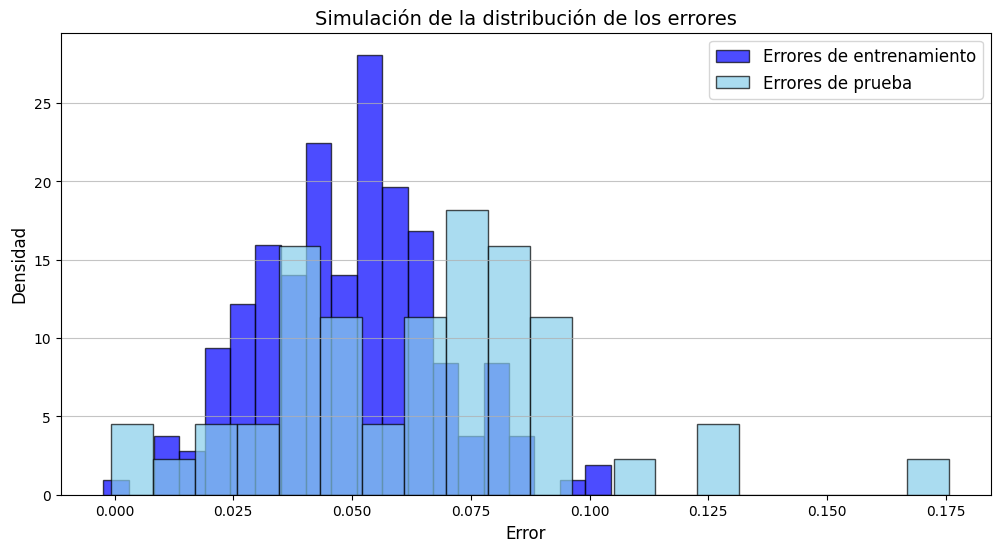

In [23]:

# Simulación de errores
np.random.seed(42)
train_errors = np.random.normal(loc=0.05, scale=0.02, size=200)  
test_errors = np.random.normal(loc=0.06, scale=0.03, size=50)   
# Visualización de las distribuciones
plt.figure(figsize=(12, 6))
plt.hist(train_errors, bins=20, alpha=0.7, label='Errores de entrenamiento', color='blue', edgecolor='black', density=True)
plt.hist(test_errors, bins=20, alpha=0.7, label='Errores de prueba', color='skyblue', edgecolor='black', density=True)

plt.title('Simulación de la distribución de los errores', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


Cross validation con métrica MAPE para evaluar la robustez del modelo. (2 puntos)

In [24]:
# Creamos un score personalizado para MAPE
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [25]:
from sklearn.model_selection import cross_val_score

# Realizar una validación cruzada con los mejores hiperparámetros utilizando MAPE
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=mape_scorer)
# Convertir los scores negativos a positivos
cv_mape_scores = -cv_scores
# Calcular el promedio y la desviación estándar del MAPE
mean_cv_mape = np.mean(cv_mape_scores)
std_cv_mape = np.std(cv_mape_scores)
# Observamos los resultado en cada grupo
print(f"CV MAPE Scores: {cv_mape_scores}")
print(f"Mean CV MAPE: {mean_cv_mape}")

CV MAPE Scores: [0.11212599 0.12257168 0.11988359 0.11261053 0.11763788]
Mean CV MAPE: 0.11696593511789628


c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.974e+02, tolerance: 1.799e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.613e+02, tolerance: 1.810e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.788e+02, tolerance: 1.789e-01
  

En base a los resultados, consideramos que es robusto dada la consistencia del MAPE, ya que este no varía significativamente. Esto se puede apreciar por la media del MAPE es cercana al MAPE score (se comporta de manera estable)